In [114]:
import pandas as pd
import  numpy as np
import math

train  = pd.read_csv("train.csv", encoding="big5",header=None)
test   = pd.read_csv("test.csv", encoding="big5" ,header=None)
####take out pm25
train_unmodify_pm25=[]
index = 10
mean_of_all_data=0 
mean_num=0
for i in range (12):
    train_unmodify_pm25.append([])
    for j in range (20):
        for k in range (3,27):
            train_unmodify_pm25[i].append(float(train[k][index]))
            if(float(train[k][index]) < 100 and float(train[k][index]) >0):
                mean_num+=1    
                mean_of_all_data+=int(train[k][index])
        index+=18
###remove bad feat <0 or >100
mean_of_all_data/=5618
for i in range (12):
    for j in range (480):
        if(train_unmodify_pm25[i][j]<0 or train_unmodify_pm25[i][j]>100):
            train_unmodify_pm25[i][j]=mean_of_all_data
######remove done
###create label and feature 
train_feat=[]
train_label=[]
for i in range (12):
    for j in range (471):
        temp_mean=0
        for m in range (j,j+9):
            temp_mean+=train_unmodify_pm25[i][m]
        temp_mean/=9
        train_feat.append(temp_mean)
        train_label.append(train_unmodify_pm25[i][j+9])
######create train feat label done
train_feat_2 =[]
train_label_2=[]
for i in range (12):
    if(i==7 or i==8):
        continue
    index=0
    for j in range (48):
        temp_mean=0
        for k in range(9):
            temp_mean+=train_unmodify_pm25[i][index]
            index+=1
        temp_mean/=9
        train_feat_2.append(temp_mean)
        train_label_2.append(train_unmodify_pm25[i][index])
        index+=1
    
            



In [143]:
def gd (num_data,w,b,lr_w,lr_b):
    global train_label,train_feat
    tl=train_label_2
    tf=train_feat_2
    loss_square=0
    loss=0
    w_next=0
    b_next=0
    for i in range (num_data,num_data+50):
        y=w*tf[i]+b
        loss+=((y-tl[i])*(y-tl[i]))
        w_next+=2*(tl[i]-y)*(-tl[i])
        b_next+=2*(tl[i]-y)*(-1)
    loss_square=math.sqrt(loss/50)
    w_next=w_next*(-1)*lr_w+w
    b_next=b_next*(-1)*lr_b+b
    lr_w/=1
    lr_b/=1
    return loss,w_next,b_next,lr_w,lr_b,loss_square

def validation (w,b):
    global train_label,train_feat
    loss=0
    tl=train_label_2
    tf=train_feat_2
    for i in range (401,480):
        y=w*tf[i]+b
        loss+=((y-tl[i])*(y-tl[i]))
    loss=math.sqrt(loss/80)
    return loss

def create_test_submission(w,b):
    global train_label,train_feat


    test_feat= []
    test_label=[]
    test_title =[]
    row=9
    for i in range(260):
        pm25_mean=0
        for j in range(2,11):
            pm25_mean+=float(test[j][row])
            test_feat.append(pm25_mean/9)
        row+=18
    test_title.append("id")
    test_label.append("value")
    for i in range (260):
        test_title.append("id_"+str(i))
        test_label.append(test_feat[i]*w+b)

    df =pd.DataFrame(test_label,test_title)
    df.to_csv("my_submission.csv",header=False)

14.754188820192702 1.2089431515010436 -5.0189990038629855 11.369229621494172


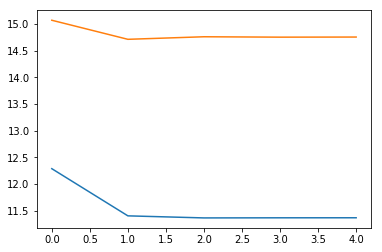

In [154]:
import matplotlib.pyplot as plt
loss_list=[]
validation_list=[]


(l,w,b,lw,lb)=(0,0.95,-5,0.00001,0.00001)
for i in range (5):
    ls=0
    w_total=0
    b_total=0
    for j in range(0,400,50):
        (l,w,b,lw,lb,loss_square)=gd(j,w,b,lw,lb)
        w_total+=w
        b_total+=b
        ls+=loss_square
    w_total/=8
    b_total/=8
    ls/=8
    w=w_total
    b=b_total
    validation_list.append(validation (w,b))
    loss_list.append(ls)
plt.plot(loss_list)
plt.plot(validation_list)
plt.savefig('loss.jpg')
print (validation (w,b),w,b,ls)
create_test_submission(w,b)

## 

In [122]:
from numpy.linalg import inv
def min_square_error ():
    global train_label_2,train_feat_2
    x=train_feat_2  
    y=train_label_2
    cons=[]
    for i in range (400):
        cons.append(1)
    a=0    #  [ a b ]
    b=0    # [ c d ]
    c=0
    d=0
    ya=0    # [ya]
    yb=0    #[yb]
    for i in range (0,400):
        temp=x[i]*x[i]
        a+=temp
        temp=x[i]*cons[i]
        b+=temp
        c+=temp
        temp=cons[i]*cons[i]
        d+=temp
    for i in range (0,400):
        temp=y[i]*x[i]
        ya+=temp
        yb+=y[i]
    a = np.array([[a, b], [c, d]])
    ainv = inv(a)
    w=ainv[0][0]*ya+ainv[0][1]*yb
    b=ainv[1][0]*ya +ainv[1][1]*yb
    print(w,b)

In [123]:
min_square_error()

0.8870830334726394 3.1568495917968846


In [91]:
create_test_submission(0.8802417868129782,2.990372273319224)

In [124]:
validation(0.8870830334726394 ,3.1568495917968846)

13.641591789565307

In [108]:
len(train_feat_2)

480